In [13]:
from skimage import color
from skimage.morphology import disk
import Dataset

dataset_list = Dataset.get_full_dataset()

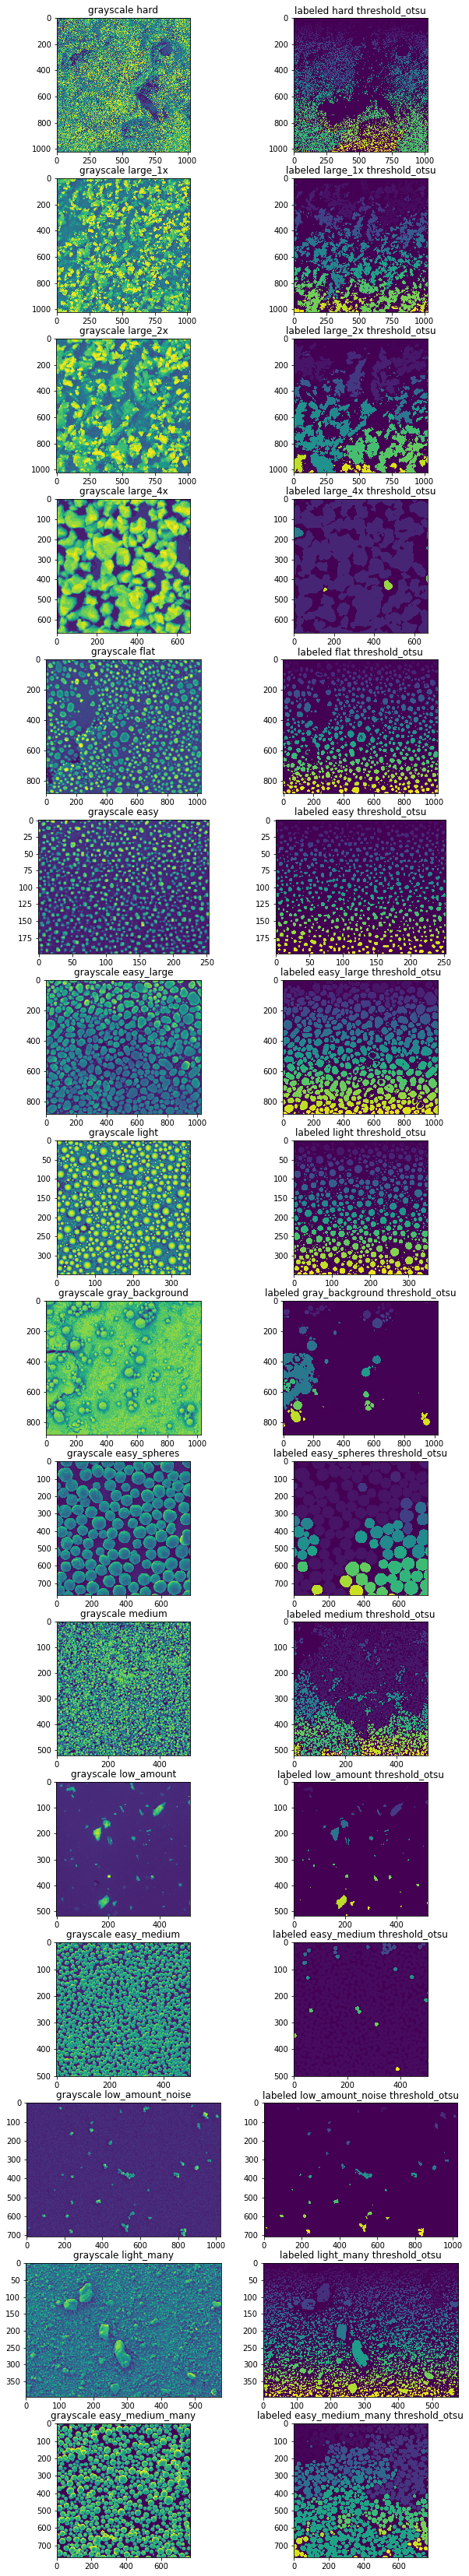

In [14]:
from skimage.filters import threshold_triangle, rank, threshold_mean, threshold_isodata, threshold_otsu
from scipy.ndimage import label
import matplotlib.pyplot as plot

log = []
row_amount = len(dataset_list)

plot.figure(figsize=(10, 60))
for i, data in enumerate(dataset_list):
    image, title = data['image'], data['title']
    
    image = color.rgb2gray(image)
    image = rank.median(image, disk(2))          # denoise
    
    plot.subplot(row_amount, 2, i*2 + 1)
    plot.imshow(image)
    plot.title(f'grayscale {title}')
    
    threshold_function = threshold_otsu
    threshold_value = threshold_function(image)
    binary = image > threshold_value
    
    labeled, amount = label(binary)
    
    plot.subplot(row_amount, 2, i*2 + 2)
    plot.imshow(labeled)
    plot.title(f'labeled {title} {threshold_function.__name__}')
    
    log.append(f'amount {title} {threshold_function.__name__}: {amount}')
    
plot.show()

In [15]:
print(*log, sep='\n')



amount hard threshold_otsu: 8044
amount large_1x threshold_otsu: 1447
amount large_2x threshold_otsu: 1058
amount large_4x threshold_otsu: 19
amount flat threshold_otsu: 870
amount easy threshold_otsu: 732
amount easy_large threshold_otsu: 507
amount light threshold_otsu: 990
amount gray_background threshold_otsu: 386
amount easy_spheres threshold_otsu: 38
amount medium threshold_otsu: 518
amount low_amount threshold_otsu: 70
amount easy_medium threshold_otsu: 36
amount low_amount_noise threshold_otsu: 40
amount light_many threshold_otsu: 2258
amount easy_medium_many threshold_otsu: 178
